# Mid-Course Project

Hi there,

I’m the host of a movie reviews podcast and I’m currently making an episode about movie review aggregators.

I found this data set from Rotten Tomatoes (inside the .ipynb file that I’ve attached). Could you dig into the data and share any interesting insights that you find? My audience loves fun facts about movies.

Thank you!\
KP

## 0. Read in the Data

In [41]:
# rotten tomatoes movie data set from Maven's data playground
import pandas as pd
import numpy as np
import seaborn as sns

movies = pd.read_csv('../Data/Rotten Tomatoes Movies.csv')
movies.head(3)

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0,254287.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0,11567.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0,14670.0


In [42]:
# let's work with a subset of the data for this project
movies = movies[['movie_title', 'rating', 'genre', 'in_theaters_date','runtime_in_minutes',
                 'tomatometer_rating', 'tomatometer_count', 'audience_rating', 'audience_count']]
movies.head()

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count
0,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",2010-02-12,83.0,49,144,53.0,254287.0
1,Please Give,R,Comedy,2010-04-30,90.0,86,140,64.0,11567.0
2,10,R,"Comedy, Romance",1979-10-05,118.0,68,22,53.0,14670.0
3,12 Angry Men (Twelve Angry Men),NR,"Classics, Drama",1957-04-13,95.0,100,51,97.0,105000.0
4,"20,000 Leagues Under The Sea",G,"Action & Adventure, Drama, Kids & Family",1954-01-01,127.0,89,27,74.0,68860.0


In [43]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_title         16638 non-null  object 
 1   rating              16638 non-null  object 
 2   genre               16621 non-null  object 
 3   in_theaters_date    15823 non-null  object 
 4   runtime_in_minutes  16483 non-null  float64
 5   tomatometer_rating  16638 non-null  int64  
 6   tomatometer_count   16638 non-null  int64  
 7   audience_rating     16386 non-null  float64
 8   audience_count      16386 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 1.1+ MB


In [44]:
movies.describe()

,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count
count,16483.000000,16638.000000,16638.000000,16386.000000,1.638600e+04
mean,102.391494,60.466522,56.607104,60.470829,1.524797e+05
std,25.028011,28.587230,66.383800,20.462368,1.817736e+06
min,1.000000,0.000000,5.000000,0.000000,5.000000e+00
25%,90.000000,38.000000,12.000000,45.000000,8.642500e+02
50%,99.000000,66.000000,28.000000,62.000000,4.876500e+03
75%,111.000000,86.000000,76.000000,77.000000,2.875200e+04
max,2000.000000,100.000000,497.000000,100.000000,3.579764e+07


In [45]:
movies.isna().sum()

movie_title             0
rating                  0
genre                  17
in_theaters_date      815
runtime_in_minutes    155
tomatometer_rating      0
tomatometer_count       0
audience_rating       252
audience_count        252
dtype: int64

In [46]:
#Correcting datatypes
movies.rating.value_counts() 
# R) and R need to be merged, PG-13 and PG-13) need to be merged
movies.rating  = np.where(movies.rating == 'PG-13)', 'PG-13', np.where(movies.rating == 'R)', 'R', movies.rating ))
movies.rating.value_counts() 

rating
R        6137
NR       4862
PG-13    2888
PG       2062
G         652
NC17       37
Name: count, dtype: int64

In [47]:
movies.in_theaters_date = pd.to_datetime(movies.in_theaters_date)

In [48]:
movies.genre.value_counts()

genre
Drama                                                                                       1727
Comedy                                                                                      1202
Comedy, Drama                                                                                819
Drama, Mystery & Suspense                                                                    683
Art House & International, Drama                                                             571
                                                                                            ... 
Action & Adventure, Art House & International, Cult Movies, Drama                              1
Animation, Art House & International, Drama, Science Fiction & Fantasy, Special Interest       1
Drama, Kids & Family, Science Fiction & Fantasy, Sports & Fitness                              1
Art House & International, Classics, Cult Movies, Horror, Science Fiction & Fantasy            1
Animation, Drama, Romanc

In [49]:
movies.isna().sum()

movie_title             0
rating                  0
genre                  17
in_theaters_date      815
runtime_in_minutes    155
tomatometer_rating      0
tomatometer_count       0
audience_rating       252
audience_count        252
dtype: int64

## 1. Explore the Data

How many movies are in this data set?

In [50]:
movies['movie_title'].count() #16,638

16638

Filter the data to only include movies that came out in 2010 or later. How many movies are in this new data set?

In [51]:
movies['year'] = movies['in_theaters_date'].dt.year

In [52]:
movies = movies[movies['in_theaters_date'] > '2010-01-01']

In [53]:
movies.isna().sum()

movie_title             0
rating                  0
genre                   5
in_theaters_date        0
runtime_in_minutes    123
tomatometer_rating      0
tomatometer_count       0
audience_rating        97
audience_count         97
year                    0
dtype: int64

In [54]:
movies[movies.audience_count.isna()]

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count,year
2019,"A Bread Factory, Part Two: Walk with Me a While",NR,"Drama, Musical & Performing Arts",2018-10-26,120.0,100,19,NaN,NaN,2018.0
2166,A Whale of a Tale,NR,Documentary,2018-08-17,95.0,88,16,NaN,NaN,2018.0
2253,Adopt a Highway,NR,Drama,2019-11-01,81.0,70,27,NaN,NaN,2019.0
2484,Altina,NR,Documentary,2014-09-12,120.0,86,7,NaN,NaN,2014.0
2608,An Encounter with Simone Weil,NR,Documentary,2012-03-23,85.0,50,6,NaN,NaN,2012.0
...,...,...,...,...,...,...,...,...,...,...
16335,Will You Still Love Me Tomorrow?,NR,Romance,2014-01-17,106.0,83,6,NaN,NaN,2014.0
16470,Wounds,R,"Drama, Horror, Mystery & Suspense",2019-03-29,101.0,53,45,NaN,NaN,2019.0
16476,Wrinkles the Clown,NR,"Comedy, Documentary, Horror",2019-10-04,78.0,67,27,NaN,NaN,2019.0
16541,Yosemite,R,Drama,2016-01-01,82.0,77,13,NaN,NaN,2016.0


Find the highest rated movies according to both critics (*tomatometer_rating*) and the general audience (*audience_rating*).

In [56]:
movies.sort_values(by = 'tomatometer_rating', ascending = False).head(10)

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count,year
3093,"Batman: The Dark Knight Returns, Part 1",PG-13,"Action & Adventure, Animation",2012-01-01,134.0,100,5,93.0,8482.0,2012.0
15659,Uncertain,NR,Documentary,2017-03-09,81.0,100,22,82.0,375.0,2017.0
8495,King Charles III,NR,Drama,2017-05-14,88.0,100,9,48.0,65.0,2017.0
8477,Killing for Love (Das Versprechen),NR,"Art House & International, Documentary",2017-12-15,124.0,100,9,82.0,201.0,2017.0
8461,Kill Zone 2 (Saat po long 2),NR,"Action & Adventure, Art House & International,...",2016-05-13,120.0,100,22,63.0,544.0,2016.0
5446,Dream Big: Engineering Our World,NR,Documentary,2017-02-17,42.0,100,7,66.0,239.0,2017.0
11796,Rewind This!,NR,"Documentary, Special Interest, Television",2013-03-01,90.0,100,21,74.0,379.0,2013.0
5536,Eagles of Death Metal: Nos Amis (Our Friends),NR,Documentary,2017-02-10,84.0,100,7,93.0,112.0,2017.0
11861,Kinyarwanda,NR,"Drama, Romance",2011-12-02,100.0,100,13,78.0,503.0,2011.0
8339,Just Charlie,NR,Drama,2018-01-30,95.0,100,7,85.0,73.0,2018.0


In [57]:
movies.sort_values(by = 'audience_rating', ascending = False).head(10)

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count,year
14566,The Miners' Hymns,NR,"Documentary, Drama, Special Interest",2012-02-08,52.0,100,10,100.0,148.0,2012.0
12579,Sin Alas,NR,"Art House & International, Drama",2015-06-11,90.0,64,11,100.0,50.0,2015.0
16438,Wonders of the Sea,NR,Documentary,2019-01-17,82.0,76,17,100.0,13.0,2019.0
12960,Sprinter,NR,Drama,2019-04-24,112.0,78,9,100.0,7.0,2019.0
14580,The Most Dangerous Year,NR,Documentary,2019-04-12,90.0,91,11,100.0,40.0,2019.0
8835,Left on Purpose,NR,"Documentary, Drama",2017-02-10,84.0,88,8,100.0,79.0,2017.0
15001,The Uncondemned,NR,Documentary,2016-10-21,81.0,100,13,100.0,124.0,2016.0
7137,Haunt,R,"Horror, Mystery & Suspense",2019-09-13,92.0,68,38,100.0,7.0,2019.0
4027,Calling All Earthlings,NR,Documentary,2018-06-29,74.0,58,12,100.0,34.0,2018.0
4239,Charm City,NR,Documentary,2018-10-19,108.0,100,16,100.0,24.0,2018.0


In [58]:
popular_movies = movies[movies['audience_count'] >= 100000]

These top movies seem to have very few critics and audience members writing the reviews. We want to look at only the most popular movies. Filter the movies data set to only include movies that have 100k+ audience ratings. How many movies are in this data set?

In [59]:
popular_movies['movie_title'].nunique()

316

Find the highest rated **popular** movies according to both critics (*tomatometer_rating*) and the general audience (*audience_rating*).

In [62]:
popular_movies.sort_values(by = 'tomatometer_rating', ascending = False).head()

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count,year
7558,How to Train Your Dragon,PG,"Animation, Kids & Family, Science Fiction & Fa...",2010-03-26,98.0,99,208,91.0,312342.0,2010.0
15416,Toy Story 3,G,"Animation, Comedy, Kids & Family",2010-06-18,103.0,98,305,89.0,606931.0,2010.0
7925,Inside Out,PG,"Animation, Kids & Family",2015-06-19,94.0,98,357,89.0,136125.0,2015.0
16634,Zootopia,PG,"Action & Adventure, Animation, Comedy",2016-03-04,108.0,97,279,92.0,100946.0,2016.0
9355,Mad Max: Fury Road,R,"Action & Adventure, Science Fiction & Fantasy",2015-05-15,120.0,97,410,85.0,127428.0,2015.0


In [63]:
popular_movies.sort_values(by = 'audience_rating', ascending = False).head()

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count,year
16634,Zootopia,PG,"Action & Adventure, Animation, Comedy",2016-03-04,108.0,97,279,92.0,100946.0,2016.0
6950,Guardians of the Galaxy,PG-13,"Action & Adventure, Science Fiction & Fantasy",2014-08-01,121.0,91,316,92.0,254717.0,2014.0
4077,Captain America: The Winter Soldier,PG-13,"Action & Adventure, Science Fiction & Fantasy",2014-04-04,136.0,90,292,92.0,281524.0,2014.0
14397,The King's Speech,PG-13,Drama,2010-11-26,118.0,95,292,92.0,144306.0,2010.0
14549,The Martian,PG-13,Science Fiction & Fantasy,2015-10-02,164.0,91,361,91.0,131093.0,2015.0


A lot of these popular movies seem to have a PG or PG-13 rating. How many movies fall under each type of rating?

*Use this popular movies data set going forward in this notebook.*

In [64]:
popular_movies.groupby('rating')['movie_title'].nunique()

rating
G          5
PG        51
PG-13    160
R        100
Name: movie_title, dtype: int64

What is the average audience rating for each movie rating type? Which rating type is most highly rated?

In [65]:
popular_movies.groupby('rating')['audience_rating'].mean()
#PG-13 is definitely higher rated

rating
G        66.200000
PG       66.823529
PG-13    67.293750
R        63.010000
Name: audience_rating, dtype: float64

## 2. Create New Columns

Create a column in the DataFrame called 'Animation' and return a 1 if a movie is an 'Animation' movie and 0 otherwise. Do the same for *Action & Adventure* and *Comedy*.

*Hint: use np.where and str.contains*

In [66]:
popular_movies['Animation'] = np.where(popular_movies.genre.str.lower().str.contains('animation'), 1, 0)
popular_movies['Action & Adventure'] = np.where(popular_movies.genre.str.lower().str.contains('action & adventure'), 1, 0)
popular_movies['Comedy'] = np.where(popular_movies.genre.str.lower().str.contains('comedy'), 1, 0)


movies.head()

C:\Users\Yumna\AppData\Local\Temp\ipykernel_8560\520132727.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popular_movies['Animation'] = np.where(popular_movies.genre.str.lower().str.contains('animation'), 1, 0)
C:\Users\Yumna\AppData\Local\Temp\ipykernel_8560\520132727.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popular_movies['Action & Adventure'] = np.where(popular_movies.genre.str.lower().str.contains('action & adventure'), 1, 0)
C:\Users\Yumna\AppData\Local\Temp\ipykernel_8560\520132727.py:

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count,year
0,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",2010-02-12,83.0,49,144,53.0,254287.0,2010.0
1,Please Give,R,Comedy,2010-04-30,90.0,86,140,64.0,11567.0,2010.0
97,Fireflies in the Garden,R,Drama,2011-10-14,98.0,22,54,45.0,45150.0,2011.0
130,The Oxford Murders,R,"Art House & International, Drama, Horror, Myst...",2010-08-06,110.0,9,11,33.0,14548.0,2010.0
155,Priest,PG-13,"Action & Adventure, Horror, Mystery & Suspense...",2011-05-13,83.0,15,99,46.0,86566.0,2011.0


Create a table where each row is a rating, each column is a genre and each value is the number of movies of that particular rating and genre. What insights do you gather?

In [76]:
popular_movies.groupby('rating')[['Animation','Action & Adventure','Comedy']].sum().reset_index()

,rating,Animation,Action & Adventure,Comedy
0,G,5,3,5
1,PG,26,27,29
2,PG-13,0,102,35
3,R,0,41,35


In [77]:
movies_agg = movies.groupby(['genre', 'rating'])['movie_title'].nunique().reset_index().sort_values(by = 'movie_title',ascending = False)

In [78]:
movies_agg.describe()

,movie_title
count,764.000000
mean,7.908377
std,28.140669
min,1.000000
25%,1.000000
50%,1.000000
75%,4.000000
max,393.000000


In [79]:
movies_agg[movies_agg['rating'] == 'PG-13']
#most amount of PG-13 rated movies are of type Action & Adventure, Science Fiction & Fantasy
movies_agg[movies_agg['rating'] == 'PG']
#most movies rated PG are Action & Adventure, Animation, Comedy, Kids & Fanmily
movies_agg[movies_agg['rating'] == 'R'] #19 comedy genre being the highest
movies_agg[movies_agg['rating'] == 'G'] #There are only 5 movies here 


,genre,rating,movie_title
521,Documentary,G,9
580,"Documentary, Special Interest",G,6
238,"Animation, Comedy, Kids & Family",G,4
255,"Animation, Kids & Family",G,3
343,"Art House & International, Drama",G,2
556,"Documentary, Musical & Performing Arts",G,2
439,"Comedy, Drama",G,2
526,"Documentary, Drama",G,2
259,"Animation, Kids & Family, Science Fiction & Fa...",G,2
15,"Action & Adventure, Animation, Comedy, Kids & ...",G,2


Find the average critic and audience rating for an Animation movie vs a non-Animation movie. Do the same for Action & Adventure and Comedy. What insights do you gather?

In [86]:
popular_movies.groupby('Animation')[['tomatometer_rating','audience_rating']].mean().reset_index()
#audience rating > tomatometer rating for non-animated movies. 
#almost same ratings for animated movies. 

,Animation,tomatometer_rating,audience_rating
0,0,58.340351,64.831579
1,1,75.258065,75.161290


In [83]:
popular_movies.groupby('Action & Adventure')[['tomatometer_rating','audience_rating']].mean().reset_index()
#audience rating > tomatometer rating in both cases.  


,Action & Adventure,tomatometer_rating,audience_rating
0,0,59.111888,65.391608
1,1,60.734104,66.219653


In [85]:
popular_movies.groupby('Comedy')[['tomatometer_rating','audience_rating']].mean().reset_index()


,Comedy,tomatometer_rating,audience_rating
0,0,62.169811,67.353774
1,1,55.576923,62.769231


In [37]:
#Looks like most people like non comedy movies, the rating for them seems to be higher than the audience rating for comedy movies. 
#action and adventure movies seem to be the clear winner here. 
#audience rating > tomatometer rating in both cases.  


## 3. Visualize the Data

Create a pair plot from the popular movies DataFrame.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


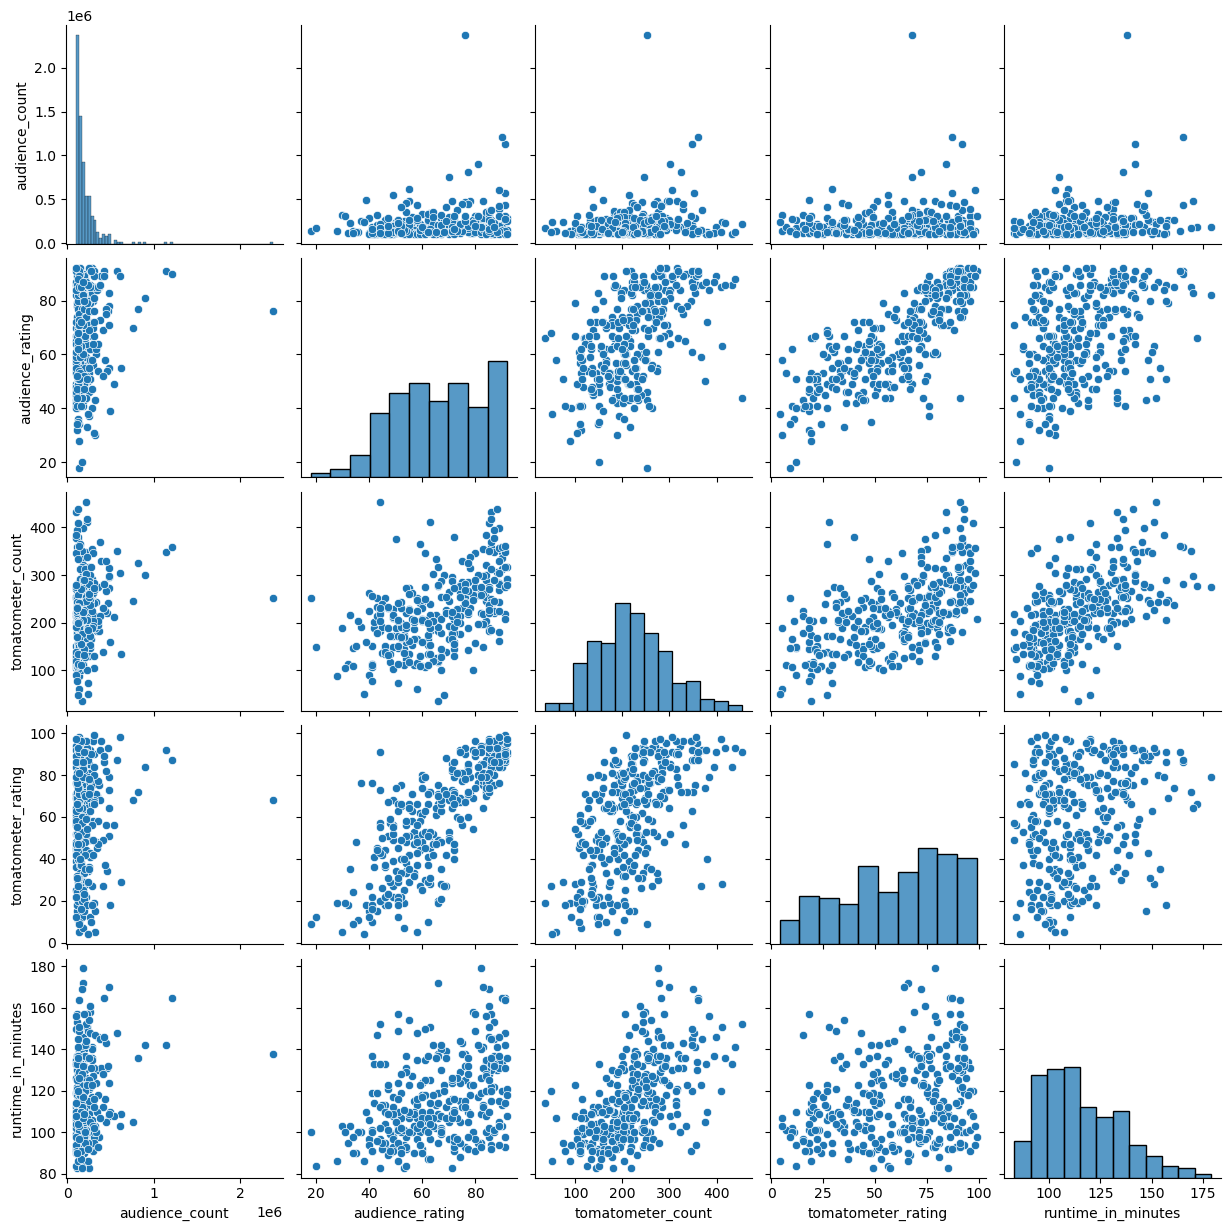

In [89]:
sns.pairplot(popular_movies[['audience_count','audience_rating','tomatometer_count','tomatometer_rating', 'runtime_in_minutes']])

What insights can you gather from this pair plot?
* How do the critic ratings (tomatometer_rating) compare with the audience ratings (compare the histograms)?
* What are some surprising findings about the run times of movies compared with other fields (look at the scatter plots)?
* What is the most popular movie by far in terms of the number of audience ratings?

In [88]:
popular_movies[['runtime_in_minutes','tomatometer_rating','tomatometer_count','audience_rating','audience_count']].corr()

,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count
runtime_in_minutes,1.000000,0.261717,0.581755,0.396743,0.225332
tomatometer_rating,0.261717,1.000000,0.581145,0.798293,0.098334
tomatometer_count,0.581755,0.581145,1.000000,0.528196,0.192638
audience_rating,0.396743,0.798293,0.528196,1.000000,0.158131
audience_count,0.225332,0.098334,0.192638,0.158131,1.000000


* runtime in minutes - skewed to left, meaning most have shorter runtime
* runtime in minutes and tomatometer_count - +ve correlation
* tomatometer_rating and audience rating - both right skewed
* strong correlation between audience rating and tomatometer rating
* tomatometer_count - normally distributed